### Naional Data 15 Day Forecast  ICU Reg Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [4]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-08,277367.0,2622,32406.0,20483.0,4193,104600.0,593679.0,164563564,1184838,3359.0,7245.0,14930563,213498,5786915.0,56,207572528,1638354
1,1,2020-12-07,274745.0,1347,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14717065,180193,5714557.0,56,205934174,1835388
2,2,2020-12-06,273398.0,1146,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,3322.0,7095.0,14536872,177801,5624609.0,56,204098786,1648306
3,3,2020-12-05,272252.0,2461,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,3321.0,7006.0,14359071,212880,5576152.0,56,202450480,2190899
4,4,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,317,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
318,318,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
319,319,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
320,320,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [5]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (322, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [6]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [7]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [8]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-08,32406.0,20483.0,4193,104600.0,593679.0,164563564,1184838,7245.0,14930563,213498,5786915.0,207572528,1638354
1,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388
2,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
3,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
4,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
318,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
319,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
320,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [10]:
# Cut the data by date - start date April end date December
start_date = '2020-04-01'
end_date = '2020-12-02'
mask = (df_Covid_data['date'] > start_date) & (df_Covid_data['date'] <= end_date)
covid  = df_Covid_data.loc[mask]
covid

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
6,2020-12-02,31038.0,19680.0,5028,100322.0,570121.0,156787587,982032,6855.0,13711156,195796,5322128.0,196576482,1459202
7,2020-12-01,30749.0,19295.0,5222,98777.0,565093.0,155805555,1941714,6649.0,13515360,176753,5226581.0,195117280,2340996
8,2020-11-30,30469.0,18801.0,3394,96149.0,559871.0,153863841,1219808,6520.0,13338607,147587,5146643.0,192776284,1603253
9,2020-11-29,30274.0,18437.0,2429,93357.0,556477.0,152644033,883148,6245.0,13191020,135242,5065148.0,191173031,1289970
10,2020-11-28,30109.0,18249.0,3404,91762.0,554048.0,151760885,1276935,6148.0,13055778,154522,5024447.0,189883061,1709566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2020-04-06,663.0,7079.0,2943,36159.0,48623.0,1595189,121910,2961.0,370872,28409,16557.0,2022867,151277
247,2020-04-05,609.0,5811.0,3937,32180.0,45680.0,1473279,94604,652.0,342463,25655,14589.0,1871590,122226
248,2020-04-04,403.0,5500.0,5012,30268.0,41743.0,1378675,195398,656.0,316808,32885,12844.0,1749364,228244
249,2020-04-03,335.0,4928.0,4603,25777.0,36731.0,1183277,100552,623.0,283923,31838,10861.0,1521120,135375


In [11]:
#Order the date 
covid = covid.sort_values(by = 'date', ascending = True)
covid.head()

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
250,2020-04-02,305.0,4513.0,4198,22997.0,32128.0,1082725,93116,574.0,252085,28045,8586.0,1385745,122911
249,2020-04-03,335.0,4928.0,4603,25777.0,36731.0,1183277,100552,623.0,283923,31838,10861.0,1521120,135375
248,2020-04-04,403.0,5500.0,5012,30268.0,41743.0,1378675,195398,656.0,316808,32885,12844.0,1749364,228244
247,2020-04-05,609.0,5811.0,3937,32180.0,45680.0,1473279,94604,652.0,342463,25655,14589.0,1871590,122226
246,2020-04-06,663.0,7079.0,2943,36159.0,48623.0,1595189,121910,2961.0,370872,28409,16557.0,2022867,151277


In [12]:
# Replace NAN values with 0
covid = covid.fillna(0)
covid.head()

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
250,2020-04-02,305.0,4513.0,4198,22997.0,32128.0,1082725,93116,574.0,252085,28045,8586.0,1385745,122911
249,2020-04-03,335.0,4928.0,4603,25777.0,36731.0,1183277,100552,623.0,283923,31838,10861.0,1521120,135375
248,2020-04-04,403.0,5500.0,5012,30268.0,41743.0,1378675,195398,656.0,316808,32885,12844.0,1749364,228244
247,2020-04-05,609.0,5811.0,3937,32180.0,45680.0,1473279,94604,652.0,342463,25655,14589.0,1871590,122226
246,2020-04-06,663.0,7079.0,2943,36159.0,48623.0,1595189,121910,2961.0,370872,28409,16557.0,2022867,151277


In [13]:
# Export the national data csv 
covid.to_csv("nat_covid.csv")

In [14]:
# Set the date as index
covid.set_index('date', inplace =True)
covid

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-04-02,305.0,4513.0,4198,22997.0,32128.0,1082725,93116,574.0,252085,28045,8586.0,1385745,122911
2020-04-03,335.0,4928.0,4603,25777.0,36731.0,1183277,100552,623.0,283923,31838,10861.0,1521120,135375
2020-04-04,403.0,5500.0,5012,30268.0,41743.0,1378675,195398,656.0,316808,32885,12844.0,1749364,228244
2020-04-05,609.0,5811.0,3937,32180.0,45680.0,1473279,94604,652.0,342463,25655,14589.0,1871590,122226
2020-04-06,663.0,7079.0,2943,36159.0,48623.0,1595189,121910,2961.0,370872,28409,16557.0,2022867,151277
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28,30109.0,18249.0,3404,91762.0,554048.0,151760885,1276935,6148.0,13055778,154522,5024447.0,189883061,1709566
2020-11-29,30274.0,18437.0,2429,93357.0,556477.0,152644033,883148,6245.0,13191020,135242,5065148.0,191173031,1289970
2020-11-30,30469.0,18801.0,3394,96149.0,559871.0,153863841,1219808,6520.0,13338607,147587,5146643.0,192776284,1603253


In [15]:
# Specified data columns to be used in the model 
X = covid[['onVentilatorCurrently','hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease']]
y = covid['inIcuCurrently'].values.reshape(-1,1)
wt=[1/y.shape[0]*i for i in range(y.shape[0])]

In [16]:
print(X.shape, y.shape)

(245, 5) (245, 1)


<AxesSubplot:xlabel='date', ylabel='onVentilatorCurrently'>

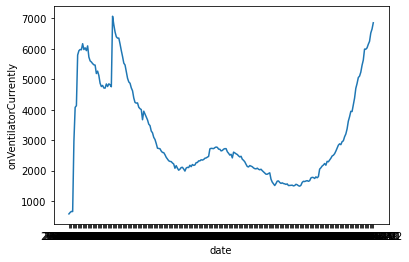

In [17]:
sns.lineplot(x='date',y='onVentilatorCurrently',data=covid)

<AxesSubplot:xlabel='date', ylabel='hospitalizedIncrease'>

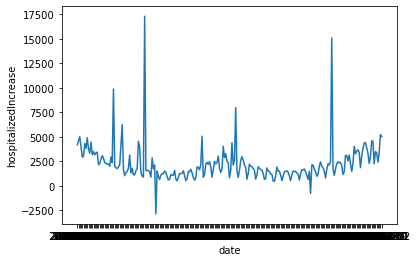

In [18]:
sns.lineplot(x='date',y='hospitalizedIncrease',data=covid)

<AxesSubplot:xlabel='date', ylabel='hospitalizedCurrently'>

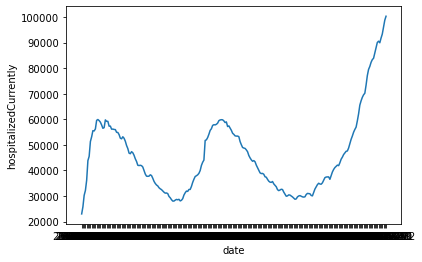

In [19]:
sns.lineplot(x='date',y='hospitalizedCurrently',data=covid)

<AxesSubplot:xlabel='date', ylabel='positive'>

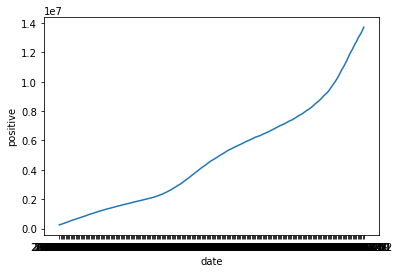

In [20]:
sns.lineplot(x='date',y='positive',data=covid)

## Train-Test-Split Data

In [21]:
#number of 15 days forecast - split test data into the future and training data into past
n_days = 15
X_train = X.iloc[0:-n_days,:]
y_train = y[0:-n_days,:]
wt_train = wt[0:-n_days]
X_test = X.iloc[-n_days:,:]
y_test = y[-n_days:,:]

In [22]:
X_train.head()

,onVentilatorCurrently,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease
date,,,,,
2020-04-02,574.0,4198,22997.0,252085,28045
2020-04-03,623.0,4603,25777.0,283923,31838
2020-04-04,656.0,5012,30268.0,316808,32885
2020-04-05,652.0,3937,32180.0,342463,25655
2020-04-06,2961.0,2943,36159.0,370872,28409


In [23]:
# Choose the model
model = LinearRegression()
model

LinearRegression()

In [24]:
model.fit(X_train, y_train, sample_weight=wt_train)

LinearRegression()

In [25]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [26]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.862721153081812
Testing Data Score: -2.135730166393548


In [27]:
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficients: [[ 1.40146862e+00  3.72351708e-02  1.30433795e-01  5.12911399e-04
  -2.60110720e-02]]
y-axis intercept: [-2450.39666781]


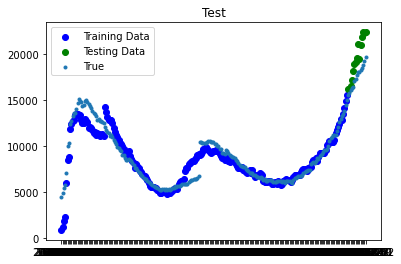

In [28]:
x = covid.index.values
x_train = x[:-n_days]
x_test = x[-n_days:]

plt.scatter(x_train,y_pred_train, c="blue", label="Training Data")
plt.scatter(x_test,y_pred_test, c="green", label="Testing Data")
plt.scatter(x,y, marker=".", label="True")

plt.legend()
plt.title("Test")
plt.show()